In [1]:
from tqdm import tqdm
import pickle
from irt import *
from selection import *
from utils import *

random_state = 42

Definitions

In [2]:
scenarios = {'boolq:':['boolq:'],
             #'civil_comments':['civil_comments:demographic=LGBTQ,',
             #                  'civil_comments:demographic=all,',
             #                  'civil_comments:demographic=black,',
             #                  'civil_comments:demographic=christian,',
             #                  'civil_comments:demographic=female,',
             #                  'civil_comments:demographic=male,',
             #                  'civil_comments:demographic=muslim,',
             #                  'civil_comments:demographic=other_religions,',
             #                  'civil_comments:demographic=white,'],
             'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':['commonsense:dataset=hellaswag,method=multiple_choice_separate_original,'],
             'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':['commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,'],
             'imdb:':['imdb:'],
             'mmlu':['mmlu:subject=abstract_algebra,method=multiple_choice_joint,',
                     'mmlu:subject=college_chemistry,method=multiple_choice_joint,',
                     'mmlu:subject=computer_security,method=multiple_choice_joint,',
                     'mmlu:subject=econometrics,method=multiple_choice_joint,',
                     'mmlu:subject=us_foreign_policy,method=multiple_choice_joint,'],
             'msmarco:track=regular,valid_topk=30,':['msmarco:track=regular,valid_topk=30,'],
             #'msmarco:track=trec,valid_topk=30,':['msmarco:track=trec,valid_topk=30,'],
             'narrative_qa:':['narrative_qa:'],
             'natural_qa:mode=closedbook,':['natural_qa:mode=closedbook,'],
             'natural_qa:mode=openbook_longans,':['natural_qa:mode=openbook_longans,'],
             'quac:':['quac:'],
             'raft':['raft:subset=ade_corpus_v2,',
                     'raft:subset=banking_77,',
                     'raft:subset=neurips_impact_statement_risks,',
                     'raft:subset=one_stop_english,',
                     'raft:subset=overruling,',
                     'raft:subset=semiconductor_org_types,',
                     'raft:subset=systematic_review_inclusion,',
                     'raft:subset=tai_safety_research,',
                     'raft:subset=terms_of_service,',
                     'raft:subset=tweet_eval_hate,',
                     'raft:subset=twitter_complaints,'],
             'truthful_qa:task=mc_single,method=multiple_choice_joint,':['truthful_qa:task=mc_single,method=multiple_choice_joint,']}
            
scenarios_metrics = {'boolq:':'em', 
                     'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,':'em',
                     'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,':'em',
                     'imdb:':'em', 
                     'mmlu':'em', 
                     'msmarco:track=regular,valid_topk=30,':'RR@10', 
                     'msmarco:track=trec,valid_topk=30,':'NDCG@10', 
                     'narrative_qa:':'f1', 
                     'natural_qa:mode=closedbook,':'f1', 
                     'natural_qa:mode=openbook_longans,':'f1', 
                     'quac:':'f1', 
                     'raft':'em', 
                     'truthful_qa:task=mc_single,method=multiple_choice_joint,':'em'}

In [3]:
scenarios = {'msmarco:track=regular,valid_topk=30,':['msmarco:track=regular,valid_topk=30,'],
             'narrative_qa:':['narrative_qa:'],
             'natural_qa:mode=closedbook,':['natural_qa:mode=closedbook,'],
             'natural_qa:mode=openbook_longans,':['natural_qa:mode=openbook_longans,'],
             'quac:':['quac:']}

## Data

Loading data

In [4]:
with open('data/helm_all_models.pickle', 'rb') as handle:
    data = pickle.load(handle)

## Results

change number_items and Ds


In [5]:
dropout = .5 #default .5
hidden = 100 #default 100
epochs = 1000 #default 2000
lr = .1 #default .1
device = 'cuda'
balance = False

num_elements = 4
iterations = 30
number_items = [30, 50, 100, 150]
Ds = [1, 3, 5, 10, 15]

### Predicting accuracy

  0%|                                                                           | 0/7 [00:00<?, ?it/s]

[00:17:20] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-msmarco:tra cli.py:111
           ck=regular,valid_topk=30,_val_all_models.jsonlines                   
           output directory: models/irt_helm/rows-0:1:2:3_D-1_scenari cli.py:112
           o-msmarco:track=regular,valid_topk=30,_val_all_models/               
[00:17:20] amortized: False                                       dataset.py:112
[00:17:20] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:21:27] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-msmarco:tra cli.py:111
           ck=regular,valid_topk=30,_val_all_models.jsonlines                   
           output directory: models/irt_helm/rows-0:1:2:3_D-15_scenar cli.py:112
           io-msmarco:track=regular,valid_topk=30,_val_all_models/              
[00:21:27] amortized: False                                       dataset.py:112
[00:21:27] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 14%|█████████▍                                                        | 1/7 [06:20<38:02, 380.37s/it]

[00:23:45] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-msmarco:tra cli.py:111
           ck=regular,valid_topk=30,_val_all_models.jsonlines                   
           output directory: models/irt_helm/rows-4:5:6:7_D-1_scenari cli.py:112
           o-msmarco:track=regular,valid_topk=30,_val_all_models/               
[00:23:45] amortized: False                                       dataset.py:112
[00:23:45] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:28:48] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-msmarco:tra cli.py:111
           ck=regular,valid_topk=30,_val_all_models.jsonlines                   
           output directory: models/irt_helm/rows-4:5:6:7_D-15_scenar cli.py:112
           io-msmarco:track=regular,valid_topk=30,_val_all_models/              
[00:28:48] amortized: False                                       dataset.py:112
[00:28:48] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 29%|██████████████████▊                                               | 2/7 [15:00<38:32, 462.41s/it]

[00:32:31] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-msmarco:t cli.py:111
           rack=regular,valid_topk=30,_val_all_models.jsonlines                 
           output directory: models/irt_helm/rows-8:9:10:11_D-1_scena cli.py:112
           rio-msmarco:track=regular,valid_topk=30,_val_all_models/             
[00:32:31] amortized: False                                       dataset.py:112
[00:32:31] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:37:17] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-msmarco:t cli.py:111
           rack=regular,valid_topk=30,_val_all_models.jsonlines                 
           output directory: models/irt_helm/rows-8:9:10:11_D-15_scen cli.py:112
           ario-msmarco:track=regular,valid_topk=30,_val_all_models/            
[00:37:17] amortized: False                                       dataset.py:112
[00:37:17] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 43%|████████████████████████████▎                                     | 3/7 [23:33<32:21, 485.49s/it]

[00:40:58] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-12:13:14:15_D-1_sce cli.py:112
           nario-msmarco:track=regular,valid_topk=30,_val_all_models/           
[00:40:58] amortized: False                                       dataset.py:112
[00:40:58] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:46:34] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-12:13:14:15_D-15_sc cli.py:112
           enario-msmarco:track=regular,valid_topk=30,_val_all_models           
           /                                                                    
[00:46:34] amortized: False                                       dataset.py:112
[00:46:34] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 

 57%|█████████████████████████████████████▋                            | 4/7 [32:34<25:22, 507.42s/it]

[00:49:50] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-16:17:18:19_D-1_sce cli.py:112
           nario-msmarco:track=regular,valid_topk=30,_val_all_models/           
[00:49:50] amortized: False                                       dataset.py:112
[00:49:50] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:53:57] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-16:17:18:19_D-15_sc cli.py:112
           enario-msmarco:track=regular,valid_topk=30,_val_all_models           
           /                                                                    
[00:53:57] amortized: False                                       dataset.py:112
[00:53:57] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 

 71%|███████████████████████████████████████████████▏                  | 5/7 [39:10<15:34, 467.35s/it]

[00:56:29] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-20:21:22:23_D-1_sce cli.py:112
           nario-msmarco:track=regular,valid_topk=30,_val_all_models/           
[00:56:29] amortized: False                                       dataset.py:112
[00:56:29] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[00:59:28] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-20:21:22:23_D-15_sc cli.py:112
           enario-msmarco:track=regular,valid_topk=30,_val_all_models           
           /                                                                    
[00:59:28] amortized: False                                       dataset.py:112
[00:59:28] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 

 86%|████████████████████████████████████████████████████████▌         | 6/7 [44:02<06:47, 407.85s/it]

[01:01:21] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-24:25:26:27_D-1_sce cli.py:112
           nario-msmarco:track=regular,valid_topk=30,_val_all_models/           
[01:01:21] amortized: False                                       dataset.py:112
[01:01:21] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[01:04:22] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-msmarco cli.py:111
           :track=regular,valid_topk=30,_val_all_models.jsonlines               
           output directory: models/irt_helm/rows-24:25:26:27_D-15_sc cli.py:112
           enario-msmarco:track=regular,valid_topk=30,_val_all_models           
           /                                                                    
[01:04:22] amortized: False                                       dataset.py:112
[01:04:22] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 

100%|██████████████████████████████████████████████████████████████████| 7/7 [50:35<00:00, 433.62s/it]


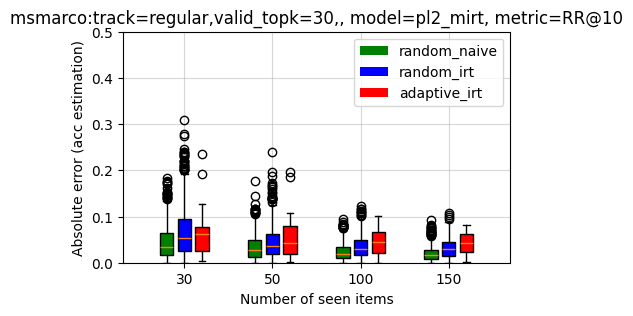

  0%|                                                                          | 0/10 [00:00<?, ?it/s]

[01:07:54] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-narrative_q cli.py:111
           a:_val_all_models.jsonlines                                          
           output directory: models/irt_helm/rows-0:1:2:3_D-1_scenari cli.py:112
           o-narrative_qa:_val_all_models/                                      
[01:07:54] amortized: False                                       dataset.py:112
[01:07:54] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:10:56] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-narrative_q cli.py:111
           a:_val_all_models.jsonlines                                          
           output directory: models/irt_helm/rows-0:1:2:3_D-15_scenar cli.py:112
           io-narrative_qa:_val_all_models/                                     
[01:10:56] amortized: False                                       dataset.py:112
[01:10:56] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 10%|██████▎                                                        | 1/10 [07:48<1:10:13, 468.18s/it]

[01:15:42] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-narrative_q cli.py:111
           a:_val_all_models.jsonlines                                          
           output directory: models/irt_helm/rows-4:5:6:7_D-1_scenari cli.py:112
           o-narrative_qa:_val_all_models/                                      
[01:15:42] amortized: False                                       dataset.py:112
[01:15:42] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:20:10] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-narrative_q cli.py:111
           a:_val_all_models.jsonlines                                          
           output directory: models/irt_helm/rows-4:5:6:7_D-15_scenar cli.py:112
           io-narrative_qa:_val_all_models/                                     
[01:20:10] amortized: False                                       dataset.py:112
[01:20:10] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 20%|████████████▌                                                  | 2/10 [17:43<1:12:22, 542.85s/it]

[01:25:37] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-narrative cli.py:111
           _qa:_val_all_models.jsonlines                                        
           output directory: models/irt_helm/rows-8:9:10:11_D-1_scena cli.py:112
           rio-narrative_qa:_val_all_models/                                    
[01:25:37] amortized: False                                       dataset.py:112
[01:25:37] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:28:38] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-narrative cli.py:111
           _qa:_val_all_models.jsonlines                                        
           output directory: models/irt_helm/rows-8:9:10:11_D-15_scen cli.py:112
           ario-narrative_qa:_val_all_models/                                   
[01:28:38] amortized: False                                       dataset.py:112
[01:28:38] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 30%|███████████████████▌                                             | 3/10 [25:11<58:16, 499.52s/it]

[01:33:05] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-12:13:14:15_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[01:33:05] amortized: False                                       dataset.py:112
[01:33:05] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:36:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-12:13:14:15_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[01:36:01] amortized: False                                       dataset.py:112
[01:36:01] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 40%|██████████████████████████                                       | 4/10 [30:50<43:38, 436.40s/it]

[01:38:45] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-16:17:18:19_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[01:38:45] amortized: False                                       dataset.py:112
[01:38:45] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:41:49] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-16:17:18:19_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[01:41:49] amortized: False                                       dataset.py:112
[01:41:49] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 50%|████████████████████████████████▌                                | 5/10 [37:50<35:51, 430.21s/it]

[01:45:44] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-20:21:22:23_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[01:45:44] amortized: False                                       dataset.py:112
[01:45:44] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:48:48] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-20:21:22:23_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[01:48:48] amortized: False                                       dataset.py:112
[01:48:48] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 60%|███████████████████████████████████████                          | 6/10 [43:28<26:36, 399.10s/it]

[01:51:23] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-24:25:26:27_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[01:51:23] amortized: False                                       dataset.py:112
[01:51:23] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[01:55:42] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-24:25:26:27_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[01:55:42] amortized: False                                       dataset.py:112
[01:55:42] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 70%|█████████████████████████████████████████████▌                   | 7/10 [53:38<23:24, 468.05s/it]

[02:01:33] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-28:29:30:31_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[02:01:33] amortized: False                                       dataset.py:112
[02:01:33] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[02:05:12] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-28:29:30:31_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[02:05:12] amortized: False                                       dataset.py:112
[02:05:12] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 80%|████████████████████████████████████████████████████             | 8/10 [59:55<14:37, 438.99s/it]

[02:07:50] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-32:33:34:35_D-1_sce cli.py:112
           nario-narrative_qa:_val_all_models/                                  
[02:07:50] amortized: False                                       dataset.py:112
[02:07:50] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[02:10:55] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-narrati cli.py:111
           ve_qa:_val_all_models.jsonlines                                      
           output directory: models/irt_helm/rows-32:33:34:35_D-15_sc cli.py:112
           enario-narrative_qa:_val_all_models/                                 
[02:10:55] amortized: False                                       dataset.py:112
[02:10:55] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

 90%|████████████████████████████████████████████████████████▋      | 9/10 [1:08:05<07:34, 454.78s/it]

[02:15:59] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-narrative_qa:_va cli.py:111
           l_all_models.jsonlines                                               
           output directory: models/irt_helm/rows-36_D-1_scenario-nar cli.py:112
           rative_qa:_val_all_models/                                           
[02:15:59] amortized: False                                       dataset.py:112
[02:15:59] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

[02:19:02] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-narrative_qa:_va cli.py:111
           l_all_models.jsonlines                                               
           output directory: models/irt_helm/rows-36_D-15_scenario-na cli.py:112
           rrative_qa:_val_all_models/                                          
[02:19:02] amortized: False                                       dataset.py:112
[02:19:02] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 470,            training.py:134
           'num_subjects': 1

100%|██████████████████████████████████████████████████████████████| 10/10 [1:13:08<00:00, 438.84s/it]


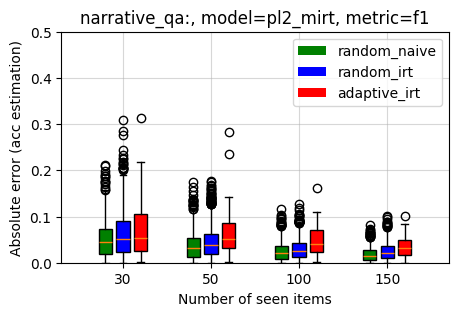

  0%|                                                                          | 0/10 [00:00<?, ?it/s]

[02:21:03] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-natural_qa: cli.py:111
           mode=closedbook,_val_all_models.jsonlines                            
           output directory: models/irt_helm/rows-0:1:2:3_D-1_scenari cli.py:112
           o-natural_qa:mode=closedbook,_val_all_models/                        
[02:21:03] amortized: False                                       dataset.py:112
[02:21:03] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[02:24:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-natural_qa: cli.py:111
           mode=closedbook,_val_all_models.jsonlines                            
           output directory: models/irt_helm/rows-0:1:2:3_D-15_scenar cli.py:112
           io-natural_qa:mode=closedbook,_val_all_models/                       
[02:24:01] amortized: False                                       dataset.py:112
[02:24:01] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 10%|██████▎                                                        | 1/10 [07:09<1:04:26, 429.59s/it]

[02:28:11] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-natural_qa: cli.py:111
           mode=closedbook,_val_all_models.jsonlines                            
           output directory: models/irt_helm/rows-4:5:6:7_D-1_scenari cli.py:112
           o-natural_qa:mode=closedbook,_val_all_models/                        
[02:28:11] amortized: False                                       dataset.py:112
[02:28:11] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[02:32:36] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-natural_qa: cli.py:111
           mode=closedbook,_val_all_models.jsonlines                            
           output directory: models/irt_helm/rows-4:5:6:7_D-15_scenar cli.py:112
           io-natural_qa:mode=closedbook,_val_all_models/                       
[02:32:36] amortized: False                                       dataset.py:112
[02:32:36] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 20%|████████████▌                                                  | 2/10 [15:15<1:01:39, 462.46s/it]

[02:36:18] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-natural_q cli.py:111
           a:mode=closedbook,_val_all_models.jsonlines                          
           output directory: models/irt_helm/rows-8:9:10:11_D-1_scena cli.py:112
           rio-natural_qa:mode=closedbook,_val_all_models/                      
[02:36:18] amortized: False                                       dataset.py:112
[02:36:18] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[02:39:20] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-natural_q cli.py:111
           a:mode=closedbook,_val_all_models.jsonlines                          
           output directory: models/irt_helm/rows-8:9:10:11_D-15_scen cli.py:112
           ario-natural_qa:mode=closedbook,_val_all_models/                     
[02:39:20] amortized: False                                       dataset.py:112
[02:39:20] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 30%|███████████████████▌                                             | 3/10 [22:25<52:14, 447.73s/it]

[02:43:28] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-12:13:14:15_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[02:43:28] amortized: False                                       dataset.py:112
[02:43:28] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[02:46:27] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-12:13:14:15_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[02:46:27] amortized: False                                       dataset.py:112
[02:46:27] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 40%|██████████████████████████                                       | 4/10 [27:29<39:05, 390.90s/it]

[02:48:32] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-16:17:18:19_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[02:48:32] amortized: False                                       dataset.py:112
[02:48:32] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[02:51:35] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-16:17:18:19_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[02:51:35] amortized: False                                       dataset.py:112
[02:51:35] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 50%|████████████████████████████████▌                                | 5/10 [35:35<35:26, 425.27s/it]

[02:56:43] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-20:21:22:23_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[02:56:43] amortized: False                                       dataset.py:112
[02:56:43] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:01:26] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-20:21:22:23_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[03:01:26] amortized: False                                       dataset.py:112
[03:01:26] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 60%|███████████████████████████████████████                          | 6/10 [43:11<29:03, 435.83s/it]

[03:04:21] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-24:25:26:27_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[03:04:21] amortized: False                                       dataset.py:112
[03:04:21] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:08:33] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-24:25:26:27_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[03:08:34] amortized: False                                       dataset.py:112
[03:08:34] Vocab size: None                                       training.py:90
[03:08:34] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 70%|█████████████████████████████████████████████▌                   | 7/10 [52:07<23:25, 468.43s/it]

[03:13:10] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-28:29:30:31_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[03:13:10] amortized: False                                       dataset.py:112
[03:13:10] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:16:13] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-28:29:30:31_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[03:16:13] amortized: False                                       dataset.py:112
[03:16:13] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 80%|████████████████████████████████████████████████████             | 8/10 [58:10<14:30, 435.12s/it]

[03:19:14] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-32:33:34:35_D-1_sce cli.py:112
           nario-natural_qa:mode=closedbook,_val_all_models/                    
[03:19:14] amortized: False                                       dataset.py:112
[03:19:14] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:22:11] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-natural cli.py:111
           _qa:mode=closedbook,_val_all_models.jsonlines                        
           output directory: models/irt_helm/rows-32:33:34:35_D-15_sc cli.py:112
           enario-natural_qa:mode=closedbook,_val_all_models/                   
[03:22:11] amortized: False                                       dataset.py:112
[03:22:11] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 90%|████████████████████████████████████████████████████████▋      | 9/10 [1:03:06<06:31, 391.36s/it]

[03:24:09] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-natural_qa:mode= cli.py:111
           closedbook,_val_all_models.jsonlines                                 
           output directory: models/irt_helm/rows-36_D-1_scenario-nat cli.py:112
           ural_qa:mode=closedbook,_val_all_models/                             
[03:24:09] amortized: False                                       dataset.py:112
[03:24:09] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:27:08] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-natural_qa:mode= cli.py:111
           closedbook,_val_all_models.jsonlines                                 
           output directory: models/irt_helm/rows-36_D-15_scenario-na cli.py:112
           tural_qa:mode=closedbook,_val_all_models/                            
[03:27:08] amortized: False                                       dataset.py:112
[03:27:08] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

100%|██████████████████████████████████████████████████████████████| 10/10 [1:07:52<00:00, 407.28s/it]


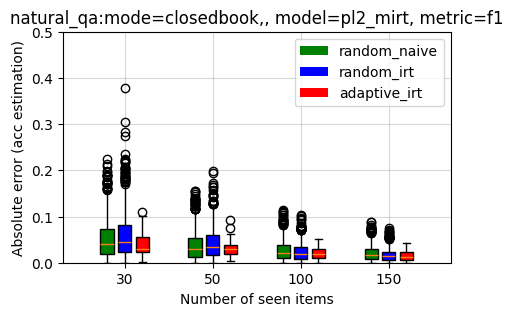

  0%|                                                                          | 0/10 [00:00<?, ?it/s]

[03:28:56] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-natural_qa: cli.py:111
           mode=openbook_longans,_val_all_models.jsonlines                      
           output directory: models/irt_helm/rows-0:1:2:3_D-1_scenari cli.py:112
           o-natural_qa:mode=openbook_longans,_val_all_models/                  
[03:28:56] amortized: False                                       dataset.py:112
[03:28:56] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:31:55] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-natural_qa: cli.py:111
           mode=openbook_longans,_val_all_models.jsonlines                      
           output directory: models/irt_helm/rows-0:1:2:3_D-15_scenar cli.py:112
           io-natural_qa:mode=openbook_longans,_val_all_models/                 
[03:31:55] amortized: False                                       dataset.py:112
[03:31:55] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 10%|██████▎                                                        | 1/10 [07:21<1:06:12, 441.39s/it]

[03:36:17] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-natural_qa: cli.py:111
           mode=openbook_longans,_val_all_models.jsonlines                      
           output directory: models/irt_helm/rows-4:5:6:7_D-1_scenari cli.py:112
           o-natural_qa:mode=openbook_longans,_val_all_models/                  
[03:36:17] amortized: False                                       dataset.py:112
[03:36:18] Vocab size: None                                       training.py:90
[03:36:18] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:40:11] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-natural_qa: cli.py:111
           mode=openbook_longans,_val_all_models.jsonlines                      
           output directory: models/irt_helm/rows-4:5:6:7_D-15_scenar cli.py:112
           io-natural_qa:mode=openbook_longans,_val_all_models/                 
[03:40:11] amortized: False                                       dataset.py:112
[03:40:11] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 20%|████████████▌                                                  | 2/10 [17:11<1:10:31, 528.97s/it]

[03:46:05] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-natural_q cli.py:111
           a:mode=openbook_longans,_val_all_models.jsonlines                    
           output directory: models/irt_helm/rows-8:9:10:11_D-1_scena cli.py:112
           rio-natural_qa:mode=openbook_longans,_val_all_models/                
[03:46:05] amortized: False                                       dataset.py:112
[03:46:05] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:50:15] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-natural_q cli.py:111
           a:mode=openbook_longans,_val_all_models.jsonlines                    
           output directory: models/irt_helm/rows-8:9:10:11_D-15_scen cli.py:112
           ario-natural_qa:mode=openbook_longans,_val_all_models/               
[03:50:15] amortized: False                                       dataset.py:112
[03:50:16] Vocab size: None                                       training.py:90
[03:50:16] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 30%|███████████████████▌                                             | 3/10 [24:17<56:13, 481.92s/it]

[03:53:14] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-12:13:14:15_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[03:53:14] amortized: False                                       dataset.py:112
[03:53:14] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[03:56:12] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-12:13:14:15_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[03:56:12] amortized: False                                       dataset.py:112
[03:56:12] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 40%|██████████████████████████                                       | 4/10 [29:07<40:36, 406.00s/it]

[03:58:03] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-16:17:18:19_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[03:58:03] amortized: False                                       dataset.py:112
[03:58:03] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:01:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-16:17:18:19_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[04:01:01] amortized: False                                       dataset.py:112
[04:01:01] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 50%|████████████████████████████████▌                                | 5/10 [36:35<35:05, 421.13s/it]

[04:05:31] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-20:21:22:23_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[04:05:31] amortized: False                                       dataset.py:112
[04:05:31] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:08:28] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-20:21:22:23_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[04:08:28] amortized: False                                       dataset.py:112
[04:08:28] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 60%|███████████████████████████████████████                          | 6/10 [44:47<29:41, 445.46s/it]

[04:13:47] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-24:25:26:27_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[04:13:47] amortized: False                                       dataset.py:112
[04:13:47] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:18:09] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-24:25:26:27_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[04:18:09] amortized: False                                       dataset.py:112
[04:18:09] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 70%|█████████████████████████████████████████████▌                   | 7/10 [52:55<22:57, 459.18s/it]

[04:21:51] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-28:29:30:31_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[04:21:51] amortized: False                                       dataset.py:112
[04:21:51] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:24:51] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-28:29:30:31_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[04:24:51] amortized: False                                       dataset.py:112
[04:24:51] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 80%|████████████████████████████████████████████████████             | 8/10 [57:58<13:39, 409.66s/it]

[04:26:55] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-32:33:34:35_D-1_sce cli.py:112
           nario-natural_qa:mode=openbook_longans,_val_all_models/              
[04:26:55] amortized: False                                       dataset.py:112
[04:26:55] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:29:58] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-natural cli.py:111
           _qa:mode=openbook_longans,_val_all_models.jsonlines                  
           output directory: models/irt_helm/rows-32:33:34:35_D-15_sc cli.py:112
           enario-natural_qa:mode=openbook_longans,_val_all_models/             
[04:29:58] amortized: False                                       dataset.py:112
[04:29:58] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 90%|████████████████████████████████████████████████████████▋      | 9/10 [1:03:46<06:30, 390.17s/it]

[04:32:42] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-natural_qa:mode= cli.py:111
           openbook_longans,_val_all_models.jsonlines                           
           output directory: models/irt_helm/rows-36_D-1_scenario-nat cli.py:112
           ural_qa:mode=openbook_longans,_val_all_models/                       
[04:32:42] amortized: False                                       dataset.py:112
[04:32:42] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:35:40] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-natural_qa:mode= cli.py:111
           openbook_longans,_val_all_models.jsonlines                           
           output directory: models/irt_helm/rows-36_D-15_scenario-na cli.py:112
           tural_qa:mode=openbook_longans,_val_all_models/                      
[04:35:40] amortized: False                                       dataset.py:112
[04:35:40] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

100%|██████████████████████████████████████████████████████████████| 10/10 [1:08:27<00:00, 410.72s/it]


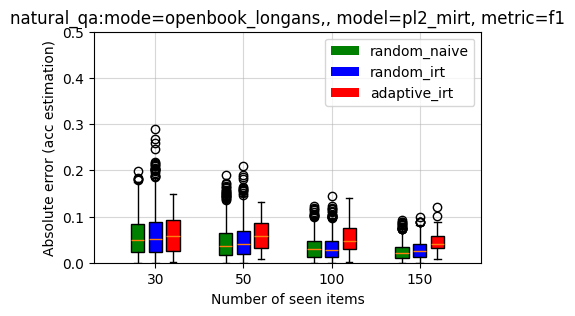

  0%|                                                                          | 0/10 [00:00<?, ?it/s]

[04:37:23] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-quac:_val_a cli.py:111
           ll_models.jsonlines                                                  
           output directory: models/irt_helm/rows-0:1:2:3_D-1_scenari cli.py:112
           o-quac:_val_all_models/                                              
[04:37:23] amortized: False                                       dataset.py:112
[04:37:23] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:40:23] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-0:1:2:3_scenario-quac:_val_a cli.py:111
           ll_models.jsonlines                                                  
           output directory: models/irt_helm/rows-0:1:2:3_D-15_scenar cli.py:112
           io-quac:_val_all_models/                                             
[04:40:23] amortized: False                                       dataset.py:112
[04:40:23] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 10%|██████▌                                                          | 1/10 [05:30<49:34, 330.49s/it]

[04:42:54] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-quac:_val_a cli.py:111
           ll_models.jsonlines                                                  
           output directory: models/irt_helm/rows-4:5:6:7_D-1_scenari cli.py:112
           o-quac:_val_all_models/                                              
[04:42:54] amortized: False                                       dataset.py:112
[04:42:54] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:46:15] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-4:5:6:7_scenario-quac:_val_a cli.py:111
           ll_models.jsonlines                                                  
           output directory: models/irt_helm/rows-4:5:6:7_D-15_scenar cli.py:112
           io-quac:_val_all_models/                                             
[04:46:15] amortized: False                                       dataset.py:112
[04:46:15] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 20%|█████████████                                                    | 2/10 [13:04<53:44, 403.01s/it]

[04:50:25] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-quac:_val cli.py:111
           _all_models.jsonlines                                                
           output directory: models/irt_helm/rows-8:9:10:11_D-1_scena cli.py:112
           rio-quac:_val_all_models/                                            
[04:50:25] amortized: False                                       dataset.py:112
[04:50:25] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[04:56:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-8:9:10:11_scenario-quac:_val cli.py:111
           _all_models.jsonlines                                                
           output directory: models/irt_helm/rows-8:9:10:11_D-15_scen cli.py:112
           ario-quac:_val_all_models/                                           
[04:56:01] amortized: False                                       dataset.py:112
[04:56:01] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 30%|██████████████████▉                                            | 3/10 [26:22<1:08:03, 583.33s/it]

[05:03:55] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-12:13:14:15_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:03:55] amortized: False                                       dataset.py:112
[05:03:55] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:11:16] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-12:13:14:15_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-12:13:14:15_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:11:16] amortized: False                                       dataset.py:112
[05:11:16] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 40%|█████████████████████████▏                                     | 4/10 [37:21<1:01:19, 613.32s/it]

[05:14:43] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-16:17:18:19_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:14:43] amortized: False                                       dataset.py:112
[05:14:43] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:20:07] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-16:17:18:19_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-16:17:18:19_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:20:07] amortized: False                                       dataset.py:112
[05:20:07] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 50%|████████████████████████████████▌                                | 5/10 [47:57<51:46, 621.39s/it]

[05:25:21] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-20:21:22:23_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:25:21] amortized: False                                       dataset.py:112
[05:25:21] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:28:17] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-20:21:22:23_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-20:21:22:23_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:28:17] amortized: False                                       dataset.py:112
[05:28:17] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 60%|███████████████████████████████████████                          | 6/10 [53:38<35:04, 526.22s/it]

[05:31:02] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-24:25:26:27_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:31:02] amortized: False                                       dataset.py:112
[05:31:02] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:34:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-24:25:26:27_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-24:25:26:27_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:34:01] amortized: False                                       dataset.py:112
[05:34:01] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 70%|█████████████████████████████████████████████▌                   | 7/10 [58:37<22:35, 451.99s/it]

[05:36:01] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-28:29:30:31_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:36:01] amortized: False                                       dataset.py:112
[05:36:02] Vocab size: None                                       training.py:90
[05:36:02] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:39:03] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-28:29:30:31_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-28:29:30:31_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:39:03] amortized: False                                       dataset.py:112
[05:39:03] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 80%|██████████████████████████████████████████████████▍            | 8/10 [1:06:38<15:22, 461.28s/it]

[05:44:00] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-32:33:34:35_D-1_sce cli.py:112
           nario-quac:_val_all_models/                                          
[05:44:00] amortized: False                                       dataset.py:112
[05:44:00] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[05:49:57] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-32:33:34:35_scenario-quac:_v cli.py:111
           al_all_models.jsonlines                                              
           output directory: models/irt_helm/rows-32:33:34:35_D-15_sc cli.py:112
           enario-quac:_val_all_models/                                         
[05:49:57] amortized: False                                       dataset.py:112
[05:49:57] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

 90%|████████████████████████████████████████████████████████▋      | 9/10 [1:19:12<09:12, 552.52s/it]

[05:56:36] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=1 lr=0.1 lr_decay=0.9999 dropout=0.5            
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-quac:_val_all_mo cli.py:111
           dels.jsonlines                                                       
           output directory:                                          cli.py:112
           models/irt_helm/rows-36_D-1_scenario-quac:_val_all_models/           
[05:56:36] amortized: False                                       dataset.py:112
[05:56:36] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

[06:00:57] config: model_type='multidim_2pl' epochs=1000 priors=None  cli.py:109
           initializers=[] dims=15 lr=0.1 lr_decay=0.9999 dropout=0.5           
           hidden=100 vocab_size=None log_every=100 seed=None                   
           deterministic=False                                                  
           data_path: data/irt_helm/rows-36_scenario-quac:_val_all_mo cli.py:111
           dels.jsonlines                                                       
           output directory: models/irt_helm/rows-36_D-15_scenario-qu cli.py:112
           ac:_val_all_models/                                                  
[06:00:57] amortized: False                                       dataset.py:112
[06:00:57] Vocab size: None                                       training.py:90
           Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 1000,           training.py:134
           'num_subjects': 1

100%|██████████████████████████████████████████████████████████████| 10/10 [1:26:23<00:00, 518.31s/it]


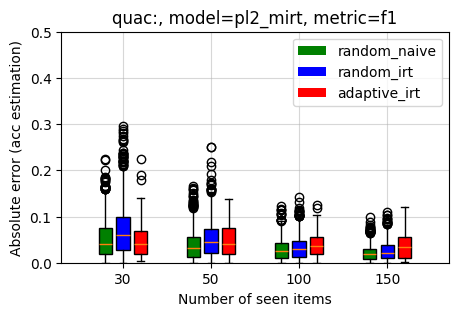

In [6]:
accs_final = []
results_final = []

for scenario in list(scenarios.keys()):

    scenario_name = scenario
    scenarios_choosen = [scenario]
    set_of_rows = create_sublists_corrected(list(range(len(data['data'][scenarios[scenario][0]]['models']))), num_elements)
    
    accs = {}
    results = {}
    
    for rows_to_hide in tqdm(set_of_rows):
        rows_to_hide_str = ':'.join([str(r) for r in rows_to_hide])
        
        ### Prep data
        scenarios_position, subscenarios_position = prepare_data(scenarios_choosen, scenarios, data)
        scores = create_responses(scenarios_choosen, scenarios, data)
        scores_train = scores[[i for i in range(scores.shape[0]) if i not in rows_to_hide]]
        scores_test = scores[[i for i in range(scores.shape[0]) if i in rows_to_hide]]

        cs = np.linspace(0,1,1000)
        c = cs[np.argmin([np.mean((np.abs((scores_train>c).mean(axis=1)-scores_train.mean(axis=1)))) for c in cs])]
        responses_train = (scores_train>c).astype(int)
        responses_test = (scores_test>c).astype(int)
        
        ### Choosing D
        train_ind = list(range(0,responses_train.shape[0],2))
        val_ind = [i for i in range(responses_train.shape[0]) if i not in train_ind]
        responses_train[train_ind].shape

        dataset_name = f'data/irt_helm/rows-{rows_to_hide_str}_scenario-{scenario_name}_val_all_models.jsonlines'
        create_irt_dataset(responses_train[train_ind], dataset_name)

        errors = []
        for D in Ds:
            model_name = f'models/irt_helm/rows-{rows_to_hide_str}_D-{D}_scenario-{scenario_name}_val_all_models/'
            train_irt_model(dataset_name, model_name, D, hidden, dropout, lr, epochs, device)
            A, B, Theta = load_irt_parameters(model_name)
            seen_items, unseen_items, _ = select_initial_adaptive_items(A, B, Theta, 2*D)
            errors.append(np.median(np.abs(responses_train[val_ind][:,unseen_items].mean(axis=1)-np.array([item_curve(estimate_ability_parameters(r, seen_items, A, B), A, B)[:,unseen_items].mean() for r in responses_train[val_ind]]))))
        D = Ds[np.argmin(errors)]
        print(D,errors)
        
        ### Saving dataset
        dataset_name = f'data/irt_helm/row-{rows_to_hide_str}_scenario-{scenario_name}_all_models.jsonlines'
        create_irt_dataset(responses_train, dataset_name)

        ### Train final IRT model
        model_name = f'models/irt_helm/row-{rows_to_hide_str}_D-validate_scenario-{scenario_name}_all_models/'
        train_irt_model(dataset_name, model_name, D, hidden, dropout, lr, epochs, device)

        ### Load IRT model
        A, B, Theta = load_irt_parameters(model_name)
        
        ### Creating storage space in acc and results to store new results
        [create_space_accs_results(accs, results, r, number_items, scenarios_choosen) for r in rows_to_hide]
        
        ### Running adaptive evaluation
        for j in range(len(rows_to_hide)):

            seen_items, unseen_items, mats = select_initial_adaptive_items(A, B, Theta, 2*D) #number_items[0]

            for number_item in number_items:

                # Number of samples
                target_count = len(scenarios_choosen)*number_item

                # Sampling new items  
                seen_items, unseen_items = run_adaptive_selection(responses_test[j], seen_items, unseen_items, scenarios_choosen, scenarios_position, A, B, mats, target_count, balance=balance)

                # Running IRT in the remaining sample 
                new_theta = estimate_ability_parameters(responses_test[j], seen_items, A, B)

                # Updating 'accs' and 'results'
                update_accs_irt('adaptive_irt', scores_test[j], responses_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, seen_items, unseen_items, A, B, new_theta, accs, number_item)
                update_results('adaptive_irt', scores_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, accs, results, number_item)
        
        ### Running random evaluation
        for j in range(len(rows_to_hide)):

            for number_item in number_items:
    
                ### Running with different seeds (ie, different seen_items)
                for it in range(iterations):
                    random.seed(random_state*it)
                    seen_items, unseen_items = get_seen_unseen_items(scenarios_choosen, scenarios, number_item, subscenarios_position, responses_test)

                    ### naive
                    # Updating 'accs' 
                    update_accs_naive('random_naive', scores_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, seen_items, accs, number_item)

                    ### IRT 
                    new_theta = estimate_ability_parameters(responses_test[j], seen_items, A, B)

                    # Updating 'accs' 
                    update_accs_irt('random_irt', scores_test[j], responses_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, seen_items, unseen_items, A, B, new_theta, accs, number_item)

                ### Updating 'results'
                update_results('random_naive', scores_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, accs, results, number_item)
                update_results('random_irt', scores_test[j], rows_to_hide[j], scenarios_choosen, scenarios_position, accs, results, number_item)
                
    ### plots
    plot_results(results, scenarios_choosen, number_items, scenarios_metrics[scenario], scenario_name, 'partial')
    
    accs_final.append(accs)
    results_final.append(results)

In [7]:
import pickle

with open('r1.pickle', 'wb') as handle:
    pickle.dump({'accs':accs_final, 'res':results_final}, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
methods = ['random_naive', 'random_irt', 'adaptive_irt']

In [9]:
def return_ind(x,lista):
    i=0
    for l in lista:
        if lista[i]==x:return i
        else: i+=1

In [10]:
l = ['boolq:',
     'commonsense:dataset=hellaswag,method=multiple_choice_separate_original,',
     'commonsense:dataset=openbookqa,method=multiple_choice_separate_calibrated,',
     'imdb:',
     'mmlu',
     'msmarco:track=regular,valid_topk=30,',
     'narrative_qa:',
     'natural_qa:mode=closedbook,',
     'natural_qa:mode=openbook_longans,',
     'quac:',
     'raft',
     'truthful_qa:task=mc_single,method=multiple_choice_joint,']

In [15]:
l = list(scenarios.keys())

In [19]:
def plot_results2(results, number_items, methods):

    irt_model = 'pl2_mirt'
    colors = ['green', 'blue', 'red', 'yellow']

    results2 = {}
    for method in methods:
        results2[method] = np.array([results[method][number_item] for number_item in number_items]).T


    for i in range(len(number_items)):
        positions = [i - 0.2, i, i + 0.2]
        for pos, d, color in zip(positions, [np.array(results2[method])[:, i] for method in methods], colors):
            plt.boxplot(d, positions=[pos], patch_artist=True, showfliers=False, showmeans=True, boxprops=dict(facecolor=color))
    plt.xlabel("Number of seen items (per scenario)")
    plt.ylabel("Absolute error (acc estimation)")
    plt.ylim(0, 0.1)
    plt.grid(alpha=.5)
    xticks = [i for i in range(len(number_items))]
    plt.xticks(xticks, [str(number_item) for number_item in number_items])
    legend_elements = [Patch(facecolor=color, label=group) for group, color in zip(methods, colors)]
    plt.legend(handles=legend_elements)
    #plt.savefig(f'plots/boxplot_metric-{metric}_scenario-{scenario}-{typ}.png', bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

In [20]:
cons_results = {}

for scenario in l: 
    for method in methods:
        cons_results[method] = {}
        for number_item in number_items:
            cons_results[method][number_item] = []
            
for scenario in l: 
    i = return_ind(scenario, list(scenarios.keys()))
    for method in methods:
        for number_item in number_items:
            #for model in results_final[i].keys():
                
                #cons_results[method][number_item]+=results_final[i][model][number_item][method][scenario].tolist()
            cons_results[method][number_item]+=[np.mean([results_final[i][model][number_item][method][scenario] for model in results_final[i].keys()])]

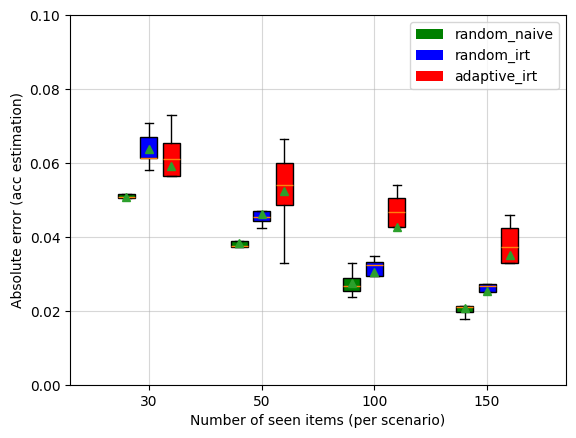

In [21]:
plot_results2(cons_results, number_items, methods)